<a href="https://colab.research.google.com/github/Nemious/Overwolf/blob/main/Pr_4_2_ru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Вершинина Вероника Денисовна Фт-320007

## Pr4.2 Применение линейной регрессии для изучения тенденций интернет трафика

### Цели
В этой практической работе вы познакомитесь с концепциями регрессии и прогнозирования.
<li>**Часть 1: Импорт библиотек  **</li>
<li>**Часть 2: Визуализация исторических данных **</li>
<li>**Часть 3. Создание простой линейной регрессионной модели: полином первого порядка **</li>
<li>**Часть 4: Создание модели линейной регрессии: полиномы более высокого порядка **</li>
<li>**Часть 5: Вычисление погрешностей**</li>
<li>**Часть 6: Создание модели нелинейной регрессии: Экспоненциальный рост **</li>
<li>**Часть 7: Сравнение модели**</li>
### История/Cценарий
В этой практической работе вы узнаете, как использовать библиотеки Python для применения моделей регрессии к данным.
В частности, вам будут показаны исторические данные о росте глобального интернет-трафика и предложено использовать эти данные для прогнозирования его объема.
### Необходимые ресурсы
* 1 ПК с доступом в Интернет
* Библиотеки Python: `pandas`, `numpy`, `sqlite3`, `matplotlib`, `folium_utils`
* Файлы данных: Internet_traffic_hist.csv, Internet_traffic_proj.csv

## Часть 1: Импорт библиотек
В этой части вы будете устанавливать и импортировать библиотеки, необходимые для завершения этой лабораторной работы.
#### Шаг 1: Установите библиотеку scikit-learn(При необходимости).
Эта библиотека может быть уже установлена.Вы можете использовать `! pip list`для того, чтобы убедиться в этом.   

In [1]:
# Ячейка для кода №1(При необходимости).
!pip install scikit-learn

#### Шаг 2. Импортируйте остальные библиотеки.
- pandas
- numpy
- pyplot (и используйте стиль fivethirtyeight или другой, какой вы предпочитаете)

In [2]:
# Ячейка для кода №2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

`sklearn` является одной из наиболее используемых библиотек Python для машинного обучения. Она реализует самые разнообразные методы и предлагает функциональные возможности для предварительной обработки, перекрестной проверки и т.д. Вы можете найти документацию, учебники и многое другое здесь: http://scikit-learn.org/stable/documentation.html

In [3]:
# Ячейка для кода №3
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

## Часть 2. Визуализация исторических данных
#### Шаг 1: Загрузка исторических данных интернет-трафика.

Загрузите набор данных `internet_traffic_hist.csv`, в `Кадр данных` библиотеки `pandas`  и визуализируйте первые несколько строк.

In [4]:
# Ячейка для кода №4
filename = '/content/sample_data/internet_traffic_hist.csv'
#df_hist = ...
#df_hist.?(?)
# Загружаем данные в DataFrame
df_hist = pd.read_csv(filename)

# Выводим первые несколько строк DataFrame
df_hist.head()

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009


#### Шаг 2: Визуализация объема трафика в Интернете.
Согласно [Cisco VNI](http://www.cisco.com/c/en/us/solutions/collateral/service-provider/visual-networking-index-vni/complete-white-paper-c11-481360.html), потребительский проводной интернет-трафик  рос на 22% в год с 2015 по 2020 год. Для этой практической работы предполагается, что темпы роста были одинаковыми за период с 2005 по 2015 год. В соответствии с этим предположением объем интернет-трафика за 2005 год имеет значение 100. `Кадр данных` `df_hist` содержит изменения объема проводного интернет-трафика до 2015 года (плюс или минус несколько изменений по годам).

Используя изученные ранее функции библиотеки `matplotlib`, визуализируйте изменение объема трафика с каждым годом.

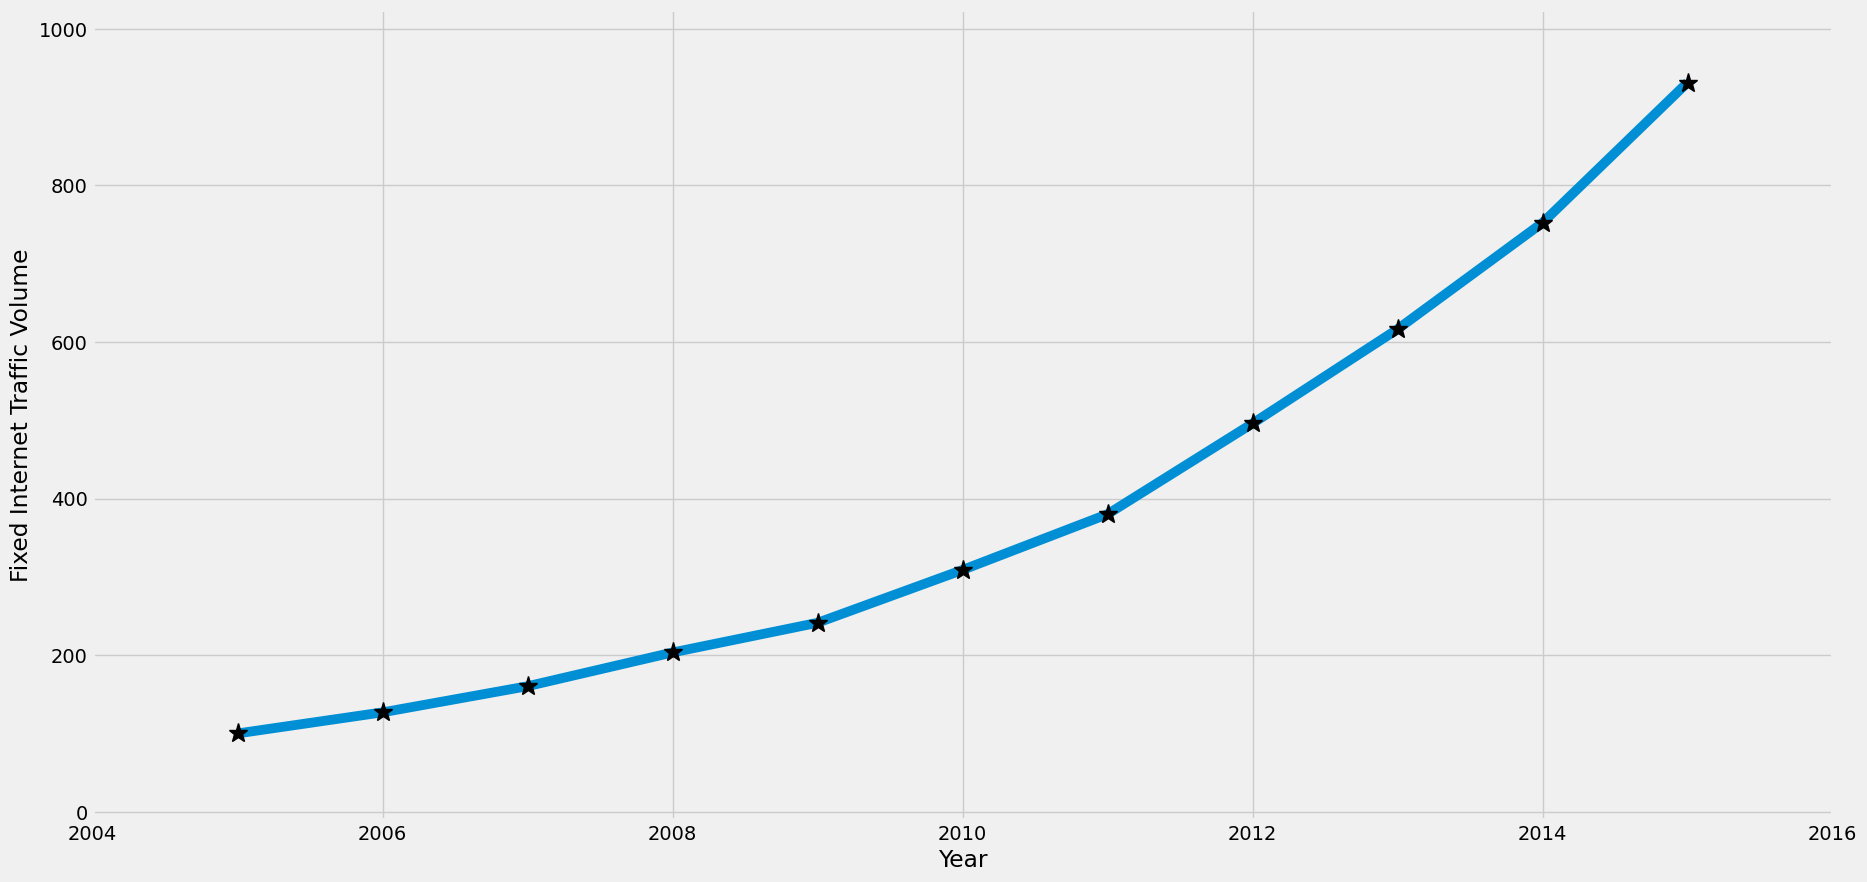

In [5]:
# Ячейка для кода №5
# Создайте фигуру немного большнго размера, используя все доступное пространство
plt.figure(figsize = (20,10))

# График XY зависимости года от траффика
x = df_hist.year
y = df_hist.traffic

# График XY зависимости года от траффика
plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'*k', markersize = 14, label = '')

#Увеличьте размеры осей, чтобы сделать график более понятным
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1,  y.iloc[-1]*1.1])

# Добавьте метки осей
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

# Увеличьте размер шрифта по умолчанию
plt.rcParams.update({'font.size': 26})
plt.show()

## Часть 3: Простая линейная регрессия: полином первого порядка

Задачу регрессии можно разбить на два этапа:

- 1) **выбор модель регрессии** (или семейство моделей), которая будет использоваться для нахождения математической взаимосвязи между наблюдаемыми переменными,


- 2) **применение** данной модели к данным, *т.е.* выбор метрики для оценки *качества соответствия* модели и вычисление значений параметров, максимизирующих такую ​​метрику.

Выбор семейства моделей для применения является первым фундаментальным шагом в регрессии.

На первом этапе *компромисс* состоит в выборе между  простой моделью,  результаты которой не всегда согласуются с наблюдаемыми данными, и более сложной, которая может обеспечить более высокое качество моделирования, но требует большего количества вычислений.

Когда выбор модели сделан, второй шаг также включает в себя *компромисс*: так называемая *дилемма смещения–дисперсии*,идея состоит в том, что даже для выбранной модели все еще можно точно настроить параметры, чтобы
- либо повысить качество применения внутри диапазона наблюдаемых данных,
- либо повысить качество прогнозирования вне этого диапазона.

В завершающей части этой практической работы вы увидите примеры того, как выбор, сделанный на первом либо втором шаге, приводит к различным решениям.
Цель регрессионного анализа - смоделировать связь между двумя количественными переменными. Общая модель полиномиальной регрессии имеет вид:

$$ y = a_0 + a_1  x  + a_2  x ^ 2 +... + a_n  x ^ n $$

где `n` порядок степени.

Чтобы понять эту модель регрессии, мы начнем с простой модели линейной регрессии, где переменная n будет равна 1.

Исходя из этого модель становится:

$$ y = a_0 + a_1  x $$

Линейная модель - это модель, параметры которой имеют линейную зависимость от переменных.

Эта модель находится в том же виде, что и линейное уравнение:

$$ y = m x + b $$

где `m` - наклон линии, а `b` - координаты точки пересечения оси у с линией регрессии.

Для семейства моделей регрессии будем учитывать **среднеквадратичную погрешность** (или MSE), как качество метрики соответствия. Идея состоит в том, чтобы наша полиномиальная функция соответствовала нашим данным *как можно ближе*.

#### Шаг 1: Применение простой модели линейной регрессии к историческим данным  Интернет - трафика.

В Python функция `polyfit` из библиотеки numpy используется для того, чтобы подогнать модель полиномиальной регрессии любого порядка и поиска параметров, которые минимизируют MSE.

Для первого упражнения с регрессией вы будете использовать семейство **полиномиальных моделей** с порядком 1, в котором переменная интернет-трафика равна $y$, а год - $x$.

The slope of line is 79.52710966244513.
The y intercept is -159457.12265833947.
The best fit simple linear regression line is 79.52710966244513x + -159457.12265833947.


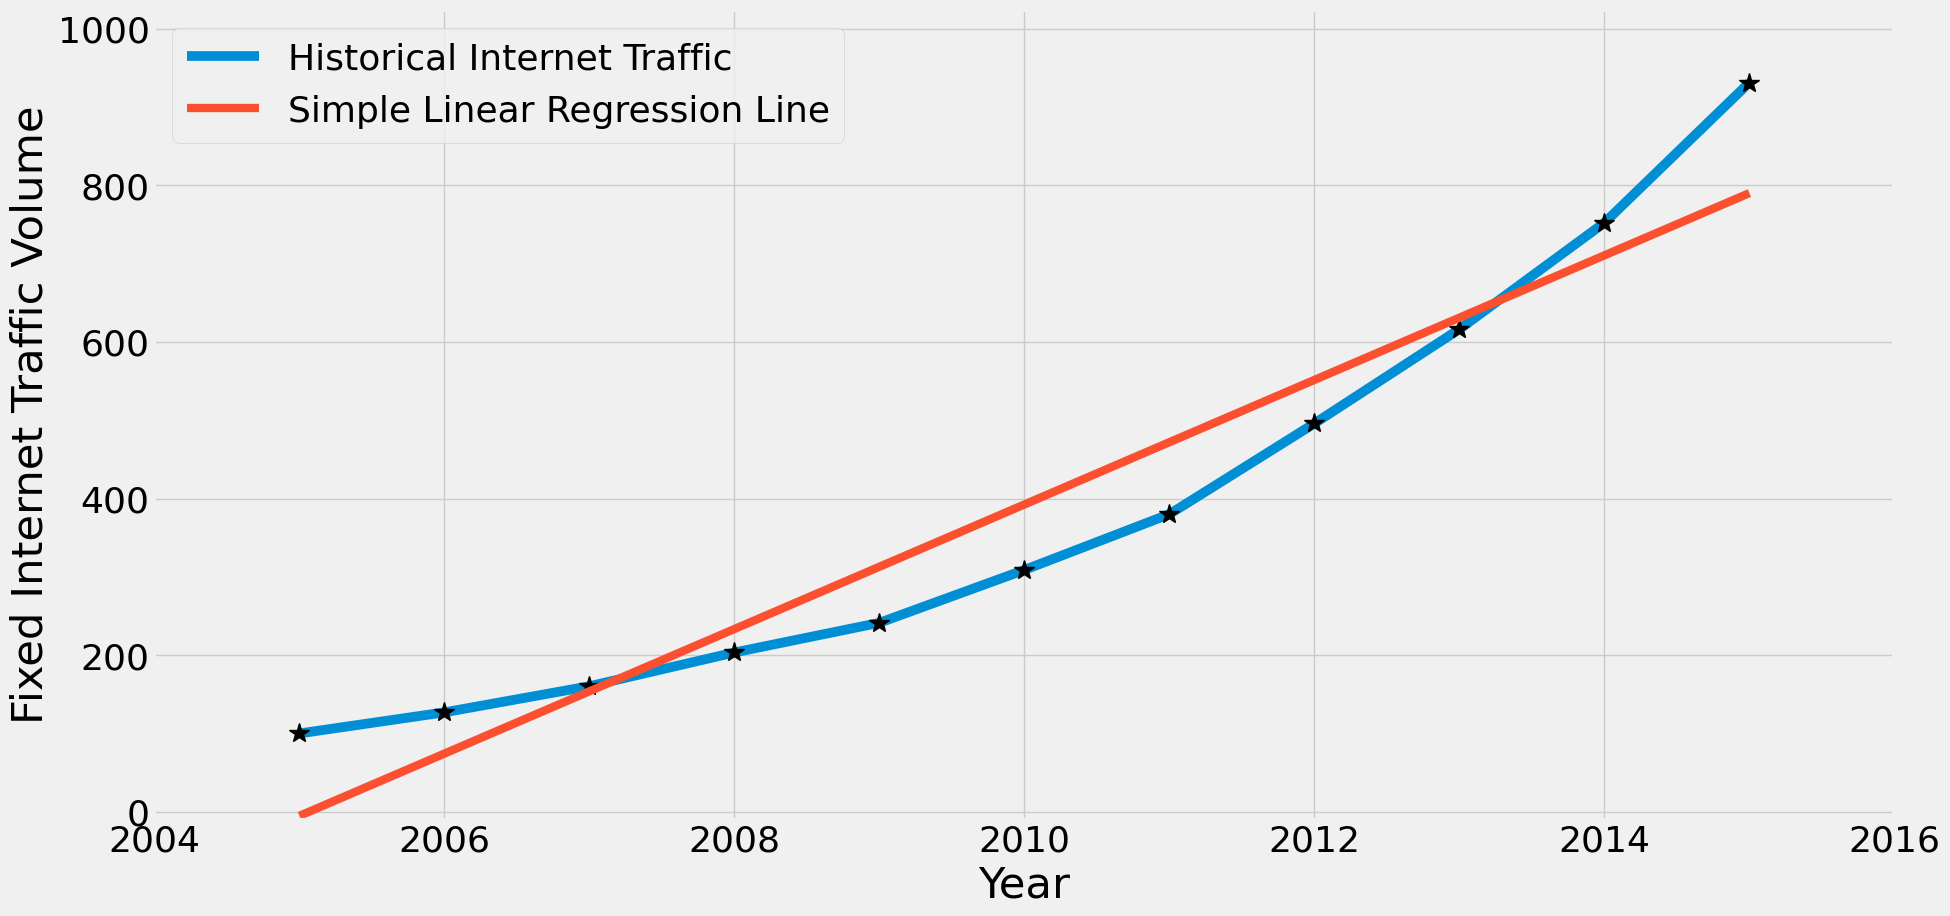

In [6]:
# Ячейка для кода №6
# Создайте фигуру немного большего размера, используя все доступное пространство
plt.figure(figsize = (20,10))

order = 1

# График XY зависимости года от траффика
x = df_hist.year
y = df_hist.traffic

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))


#Увеличьте размеры осей, чтобы сделать график более понятным
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

# Добавьте метки осей
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper left')


# Увеличьте размер шрифта по умолчанию
plt.rcParams.update({'font.size': 26})
plt.show()

## Часть 4: Линейная регрессия: полиномы более высокого порядка
График простой линейной регрессии показывает, что она является не самой подходящей моделью для описания тенденции изменения интернет-трафика в период с 2005 по 2020 год.

Вам необходимо настроить модель полиномиальной регрессии второго и третьего порядков к историческим данным роста потребления трафика Интернета, а также сохранить погрешности и MSE для каждой модели. Эти результаты будут использоваться для сравнения моделей регрессии позже в лабораторной работе.

Формула для второго порядка:

$$ y = a_0 + a_1  x  + a_2  x ^ 2  $$

Формула для третьего порядка:

$$ y = a_0 + a_1  x  + a_2  x ^ 2 + a_3  x ^ 3 $$

Вам необходимо построить полиномиальные модели с возрастающим порядком от 1 до 3 и сравнить соответствие моделей наблюдаемым данным. Полином первого порядка уже использовался в предыдущей части.

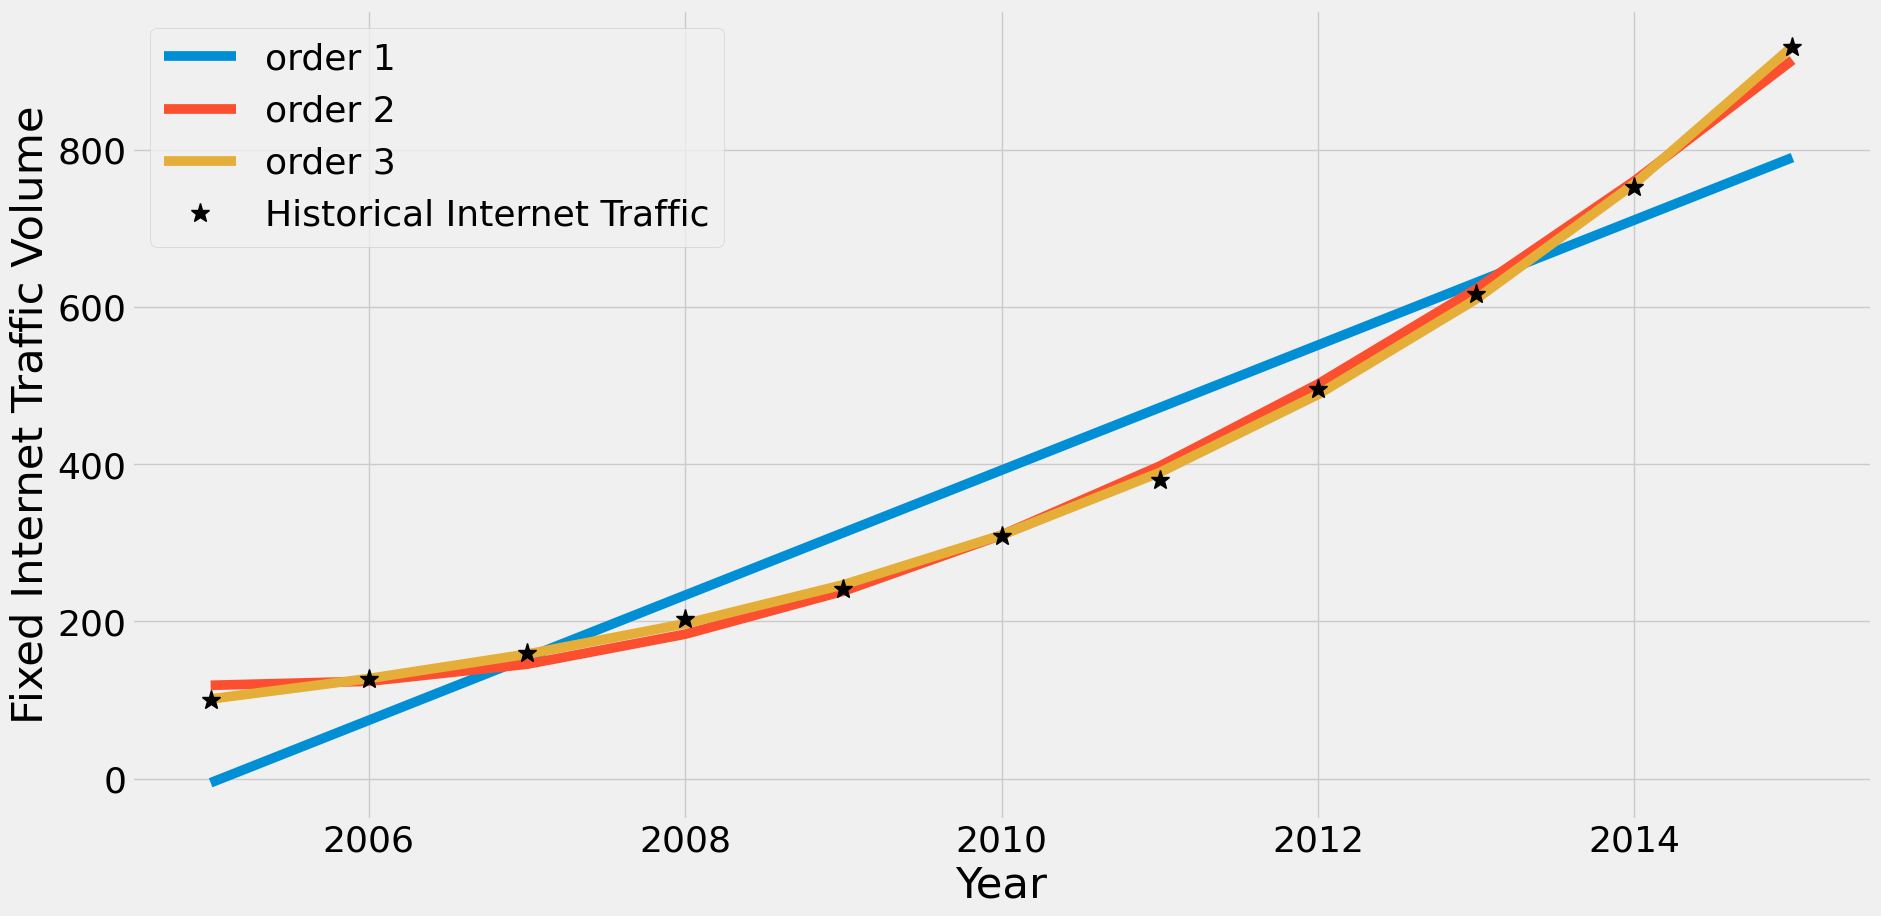

In [7]:
# Ячейка для кода №7
models = []       # для хранения параметров полиномиальной модели (список объектов poly1d)

#Создайте полиномиальные модели возрастающего порядка
for order in  range(1,4):
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)

plt.figure(figsize = (20,10))

# Визуализируйте результаты моделирования
for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Internet Traffic', linewidth = 7)
plt.legend(loc = 'upper left')

# Добавьте метки осей
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

plt.show()

## Часть 5: Вычисление погрешностей
Сравните и визуализируйте погрешности для разных моделей регрессии.

Для семейства моделей регрессии будем учитывать **среднеквадратичную погрешность** (или MSE) в качестве метрики соответствия. Идея состоит в том, чтобы наша полиномиальная функция соответствовала нашим данным *как можно ближе* данным наблюдения.

In [8]:
# Ячейка для кода №8
# Вычислите и сохраните погрешности
models = []       # для хранения параметров полиномиальной модели (список объектов poly1d)
errors_hist = []  # для хранения абсолютной погрешности для каждой точки (2005-2015) и для каждой модели (список numpy массивов)
mse_hist = []     # для хранения MSE для каждой модели (список numpy чисел с плавающей запятой)

#Примените полиномиальные модели с возрастающим порядком
for order in range (1,4):
    # Примените полиномиальную модель
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)

    e = np.abs(y-p(x))        # абсолютная погрешность
    mse = np.sum(e**2)/len(df_hist) # mse

    errors_hist.append(e)   #Сохраните абсолютные погрешности
    mse_hist.append(mse) # Сохраните mse


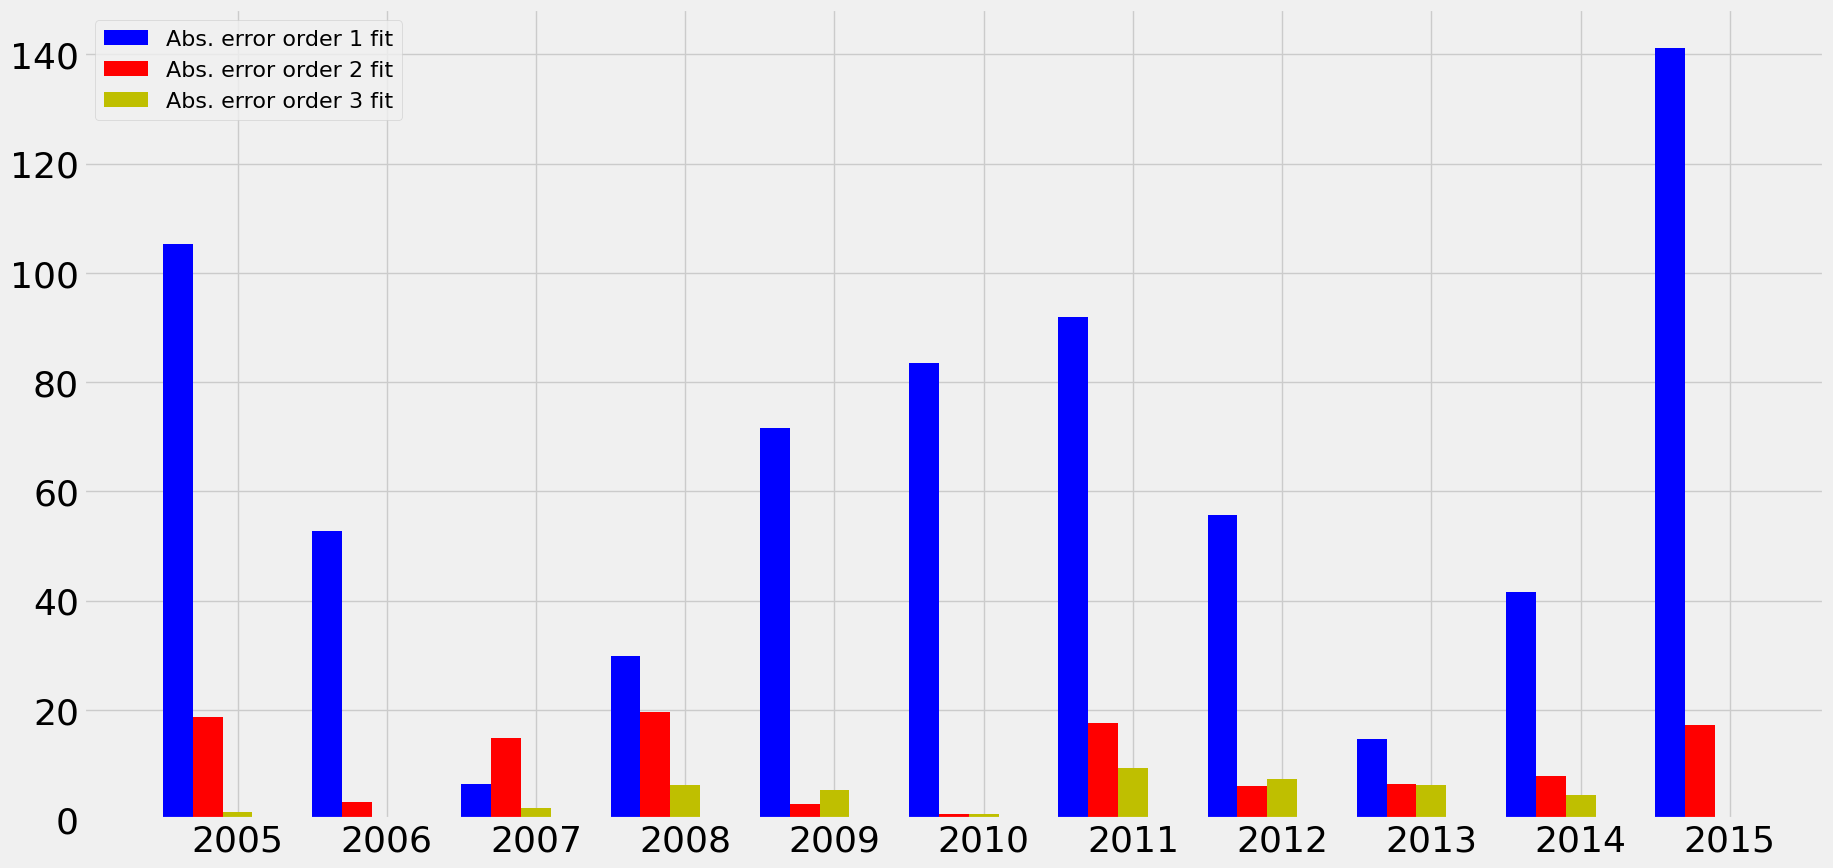

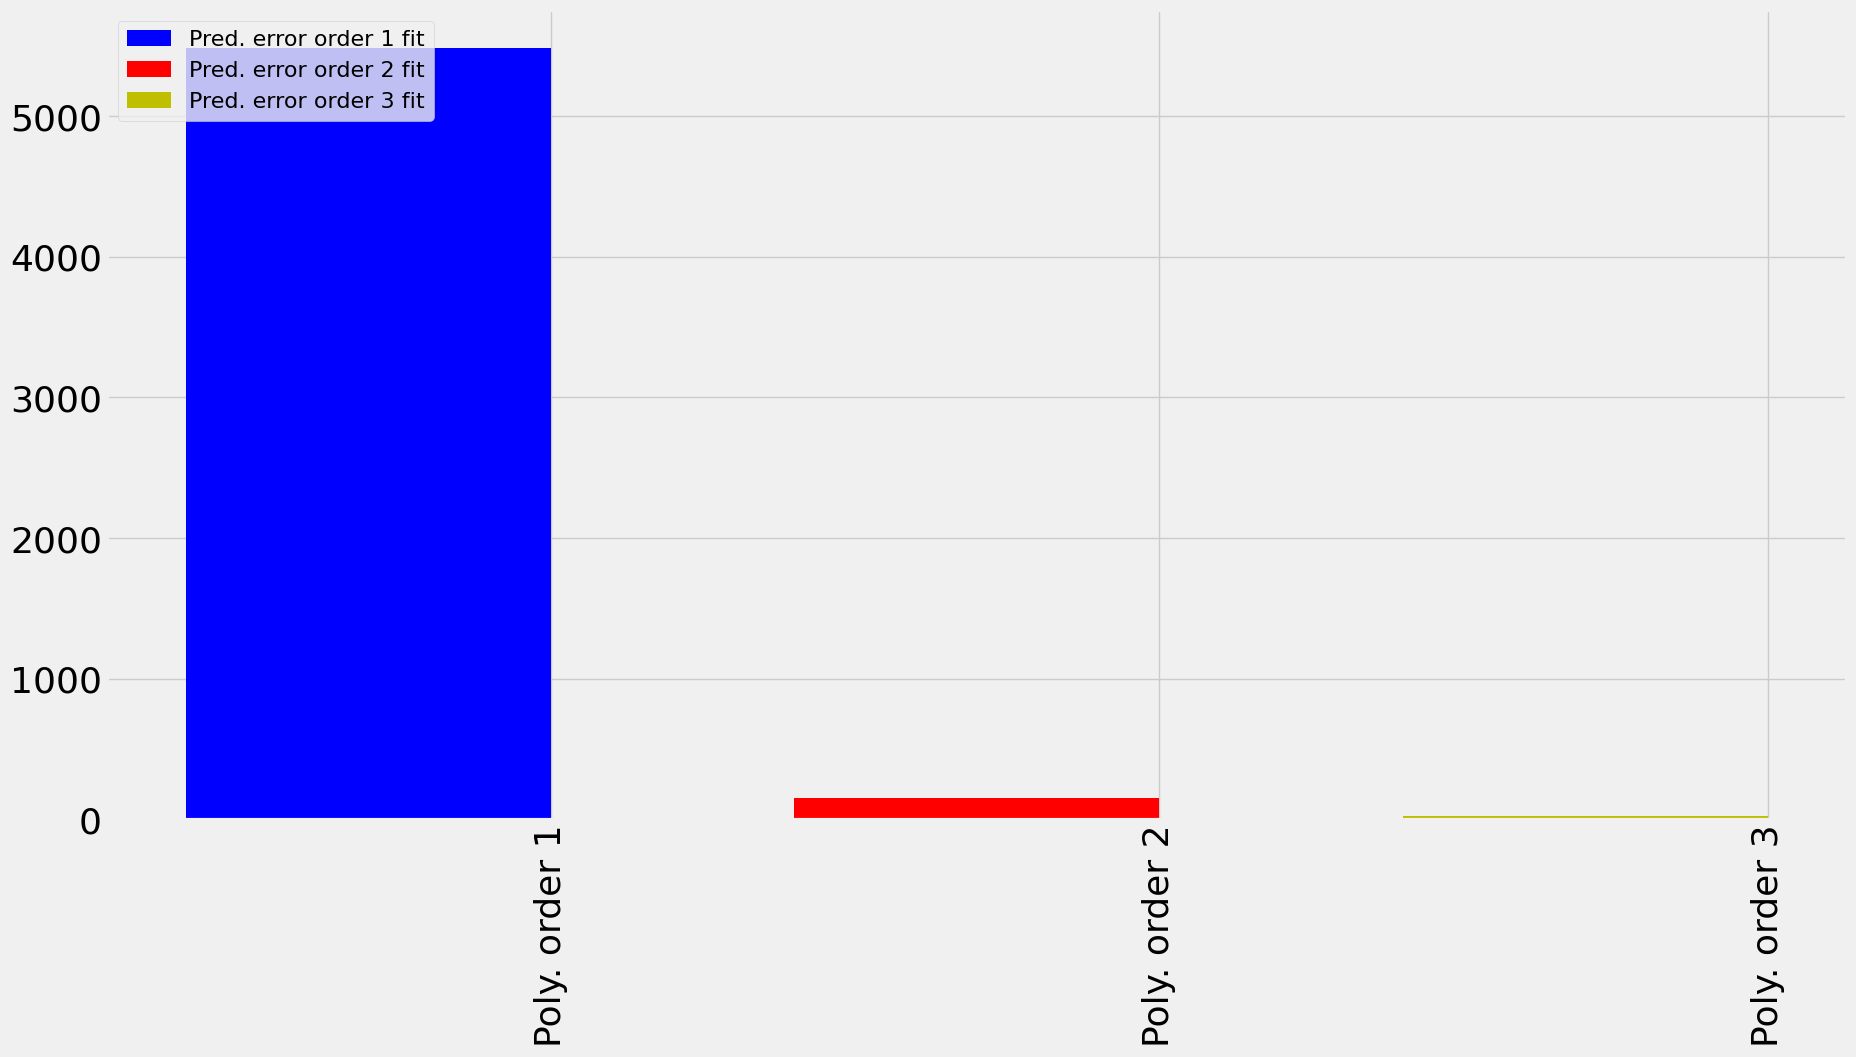

In [20]:
# Ячейка для кода №9
# Визуализируйте погрешность для каждого года

x_years = df_hist.year
width = 0.2  # Размер столбца

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

p1 = ax.bar(x_years, errors_hist[0], width, color='b', label='Abs. error order 1 fit')
p2 = ax.bar(x_years + width, errors_hist[1], width, color='r', label='Abs. error order 2 fit')
p3 = ax.bar(x_years + 2 * width, errors_hist[2], width, color='y', label='Abs. error order 3 fit')

# Настройка меток оси x
ax.set_xticks(x_years + 2 * width)
ax.set_xticklabels(x_years)

plt.legend(loc='upper left', fontsize=16)
plt.show()

# Визуализируйте MSE для каждой модели
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

x_models = np.array([0, 1, 2])  # Три модели
width = 0.6  # Размер столбца

p1 = ax.bar(x_models[0], mse_hist[0], width, color='b', label='Pred. error order 1 fit')
p2 = ax.bar(x_models[1], mse_hist[1], width, color='r', label='Pred. error order 2 fit')
p3 = ax.bar(x_models[2], mse_hist[2], width, color='y', label='Pred. error order 3 fit')

# Настройка меток оси x
ax.set_xticks(x_models + width / 2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3'], rotation=90)

plt.legend(loc='upper left', fontsize=16)
plt.show()

Из приведенного выше графика видно, что полином третьего порядка имеет наименьшую погрешность, а также, что разница в погрешностях между полиномами 2-го и 3-го порядка незначительна.

Чтобы определить параметры для этого уравнения:

$$ y = a_3 x ^ 3 + a_2  x ^ 2  + a_1  x  + a_0 $$

функция Python `polyfit` из библиотеки `numpy` может подогнать модель полиномиальной регрессии любого порядка и найти параметры, которые минимизируют MSE. В ячейке для кода ниже порядок равен 3.

In [21]:
# Ячейка для кода №10
# Порядок полиномиальной функции
order = 3

x = df_hist.year.values      # независимая переменная
y = df_hist.traffic.values   # зависимая переменная

# Примените модель и запишите значения полиномиальных параметров в массив numpy такой, что
# y = p[0]*x**order + p[1]*x*(order-1) ...

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

# poly1d - удобный класс, используемый для инкапсуляции “natural” операций на полиномах,
# так чтобы указанные операции могли принимать свою исходную форму в коде

# оберните p_array в объект poly1
p = np.poly1d(p_array)

print(type(p), p)

# используйте объект poly1d для оценки значения полинома в определенной точке
print('The value of the polynomial for x = 2020 is : {} '.format(p(2020)))

# вычислите абсолютную погрешность для каждого значения x и MSE для прогнозируемой полиномиальной модели
e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('The estimated polynomial parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated polynomial parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

<class 'numpy.ndarray'> [ 4.83129404e-01 -2.90500578e+03  5.82252085e+06 -3.89005387e+09]
<class 'numpy.poly1d'>         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The value of the polynomial for x = 2020 is : 2328.5784521102905 
The estimated polynomial parameters are:         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The errors for each value of x, given the estimated polynomial parameters are: 
 [1.30743027 0.39125264 2.02722693 6.32983208 5.28394403 0.93069802
 9.41692212 7.34010081 6.27729748 4.48133933 0.16291521]
The MSE is :25.17218620372407


Исходя из результата применения полинома третьего порядка, выражение принимает вид:
$$ y = 0.4831 x ^ 3 - 2905  x ^ 2  + 5.823 * 10^6  x  - 3.89 * 10^9 $$

## Часть 6: Нелинейная регрессионная модель: Экспоненциальный рост

В случае данных интернет-трафика мы знаем, что математическая зависимость между объемом трафика интернет и годом являетчя экспоненциальной. Поэтому мы можем использовать её в качестве модели и оценивать наилучшие подходящие параметры $a$ и $r$. Однако экспоненциальный рост является нелинейной функцией, что делает вычисление оптимальных параметров более сложной задачей. В этом случае необходим итерационный алгоритм, который возможно, не сможет привести к оптимальному решению.  

В отчете VNI указывается ожидаемый годовой темп роста. Поэтому математическую формулу, которая связывает время и объем трафика, можно определить следующим образом:

$$ y = a * (1 + r)^n $$

Где $a$ - начальное значение количества трафика, которое является зависимой переменной, $r$ является **скоростью годового роста** (выражается как коэффициент прироста между значениями двух лет подряд, *например*. 0.22), и $n$ - это **количество лет**, прошедших с $2015$, которое является независимой переменной.

Формула подчеркивает тот факт, что зависимость между зависимой и независимой переменной включает в себя возведение в степень. По этой причине эта формула называется **экспоненциальным ростом** и может использоваться для описания многих явлений в природе.

Для этой лабораторной работы мы собираемся использовать библиотеку `scipy.optimize` и её функцию `curvefit`.
Функция [`curvefit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)  требуется для определения функции кривой, а затем пытается найти наилучшие параметры для указанной функции с использованием нелинейного метода наименьших квадратов.

Детали этой функции и основного алгоритма выходят за рамки этого курса. Однако вы должны знать, что использование модели нелинейной регрессии в общем сложнее с вычислительной точки зрения и что нахождение параметров, которые максимизируют метрику соответствия *не гарантируется*. На самом деле, мы увидим, что поиск хороших параметров может зависеть от наличия хорошей исходной предпосылки.

In [22]:
# Ячейка для кода №11
# Применение нелинейной регрессионной модели

# Сначала определим функцию регрессионной модели, в этом случае мы выберем экспоненту вида y= a*(b^(x))
def my_exp_func(x, a, b):
    return a * (b ** x)

x = np.arange(2016-2005)    # независимой переменной является не сам по себе год, а количество лет с 2005 года
y = df_hist.traffic.values  # зависимая переменная

# используйте curve_fit, чтобы найти вектор экспоненциальных параметров p. cov выражает уверенность
# алгоритма в оцененных параметрах
p, cov = curve_fit(my_exp_func, x, y)
e = np.abs(y - my_exp_func(x, *p))
mse = np.sum(e**2)/len(df_hist)

print('The estimated exponential parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated exponential parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

models.append(p)

errors_hist.append(e) # Хранит абсолютную погрешность
mse_hist.append(mse)

The estimated exponential parameters are: [103.37820143   1.24678465]
The errors for each value of x, given the estimated exponential parameters are: 
 [ 3.37820143  1.95659901  0.39475804  3.03416222  8.50876827  2.65664476
  8.32850903 11.70265949 12.59154094  0.47531785  7.10276498]
The MSE is :47.23616366678714


## Часть 7: Сравнение моделей

Сравните погрешности и визуализируйте соответствие для разных моделей регрессии.

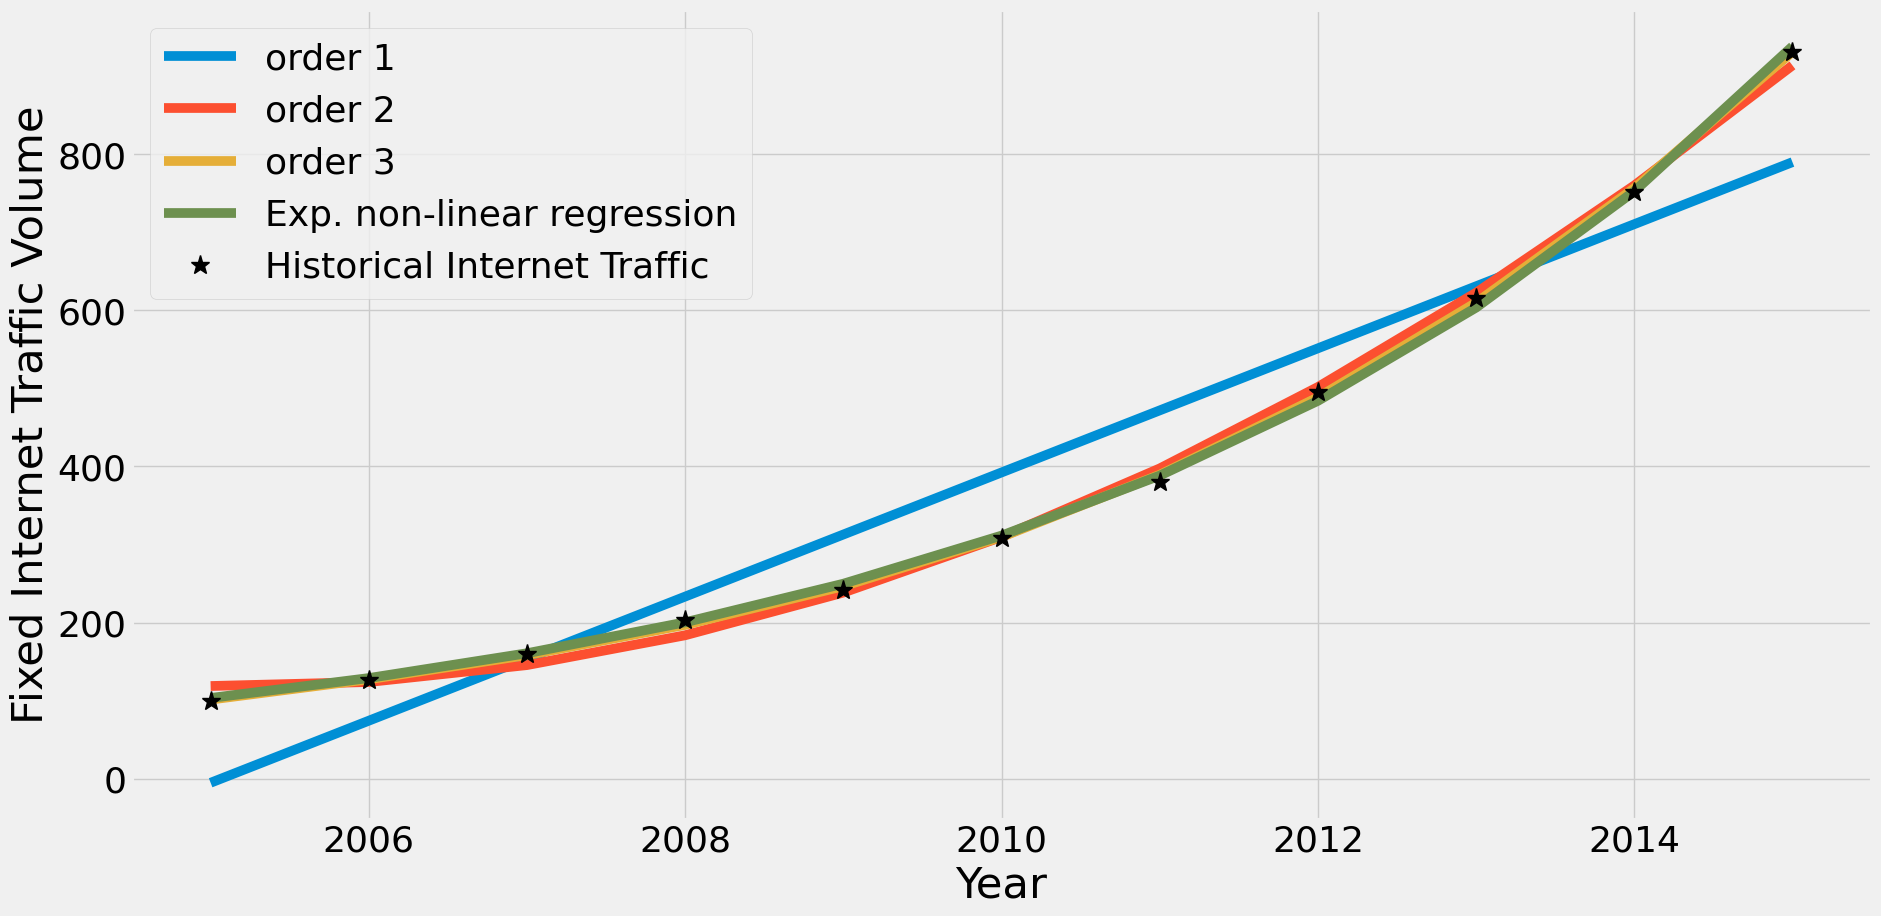

In [23]:
# Ячейка для кода №12
plt.figure(figsize = (20,10))

# Визуализируйте применимость полиномиальной модели
for model in models[0:-1]:

    x = df_hist.year.values
    y = df_hist.traffic.values
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

# Визуализируйте применимость полиномиальной модели
x = np.arange(2016-2005)    # независимой переменной является не сам по себе год, а количество лет с 2005 года
plt.plot(df_hist.year.values, my_exp_func(x, *models[-1]), label = 'Exp. non-linear regression', linewidth = 7)

plt.plot(df_hist.year, df_hist.traffic, '*k', markersize = 14, label='Historical Internet Traffic')
plt.legend(loc = 'upper left')

# Добавьте метки осей
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.show()


Для выбранного временного диапазона разница между полиномиальной моделью регрессии 2-го или 3-го порядка и экспоненциальной моделью является незначительной. Давайте посмотрим на фактические погрешности.

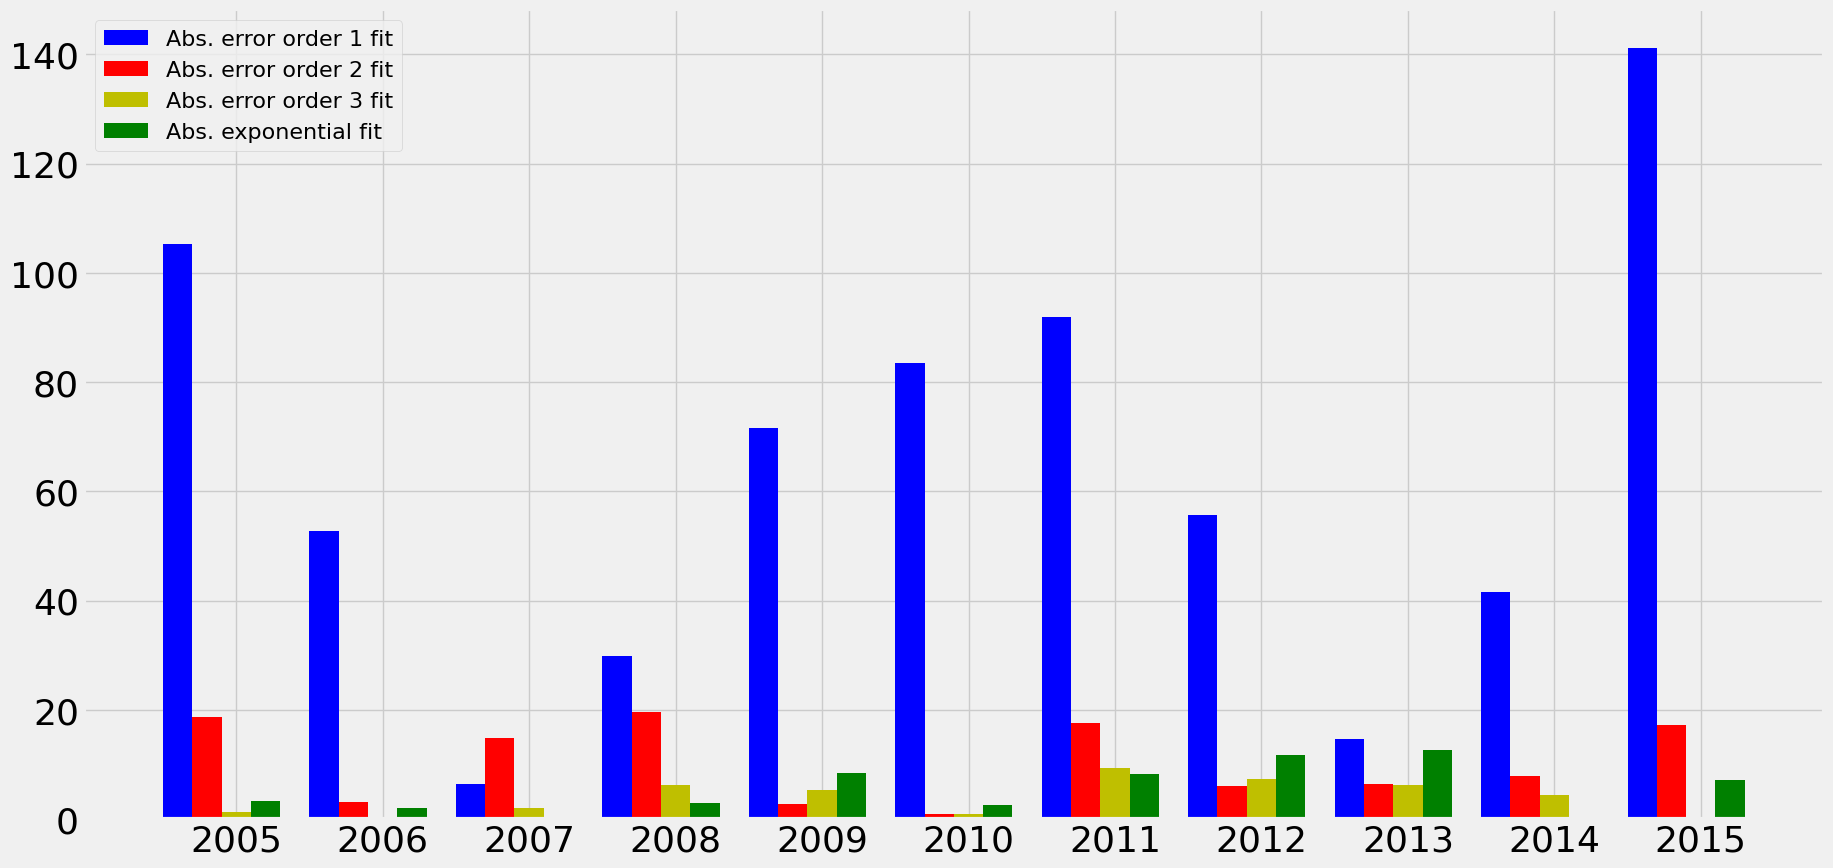

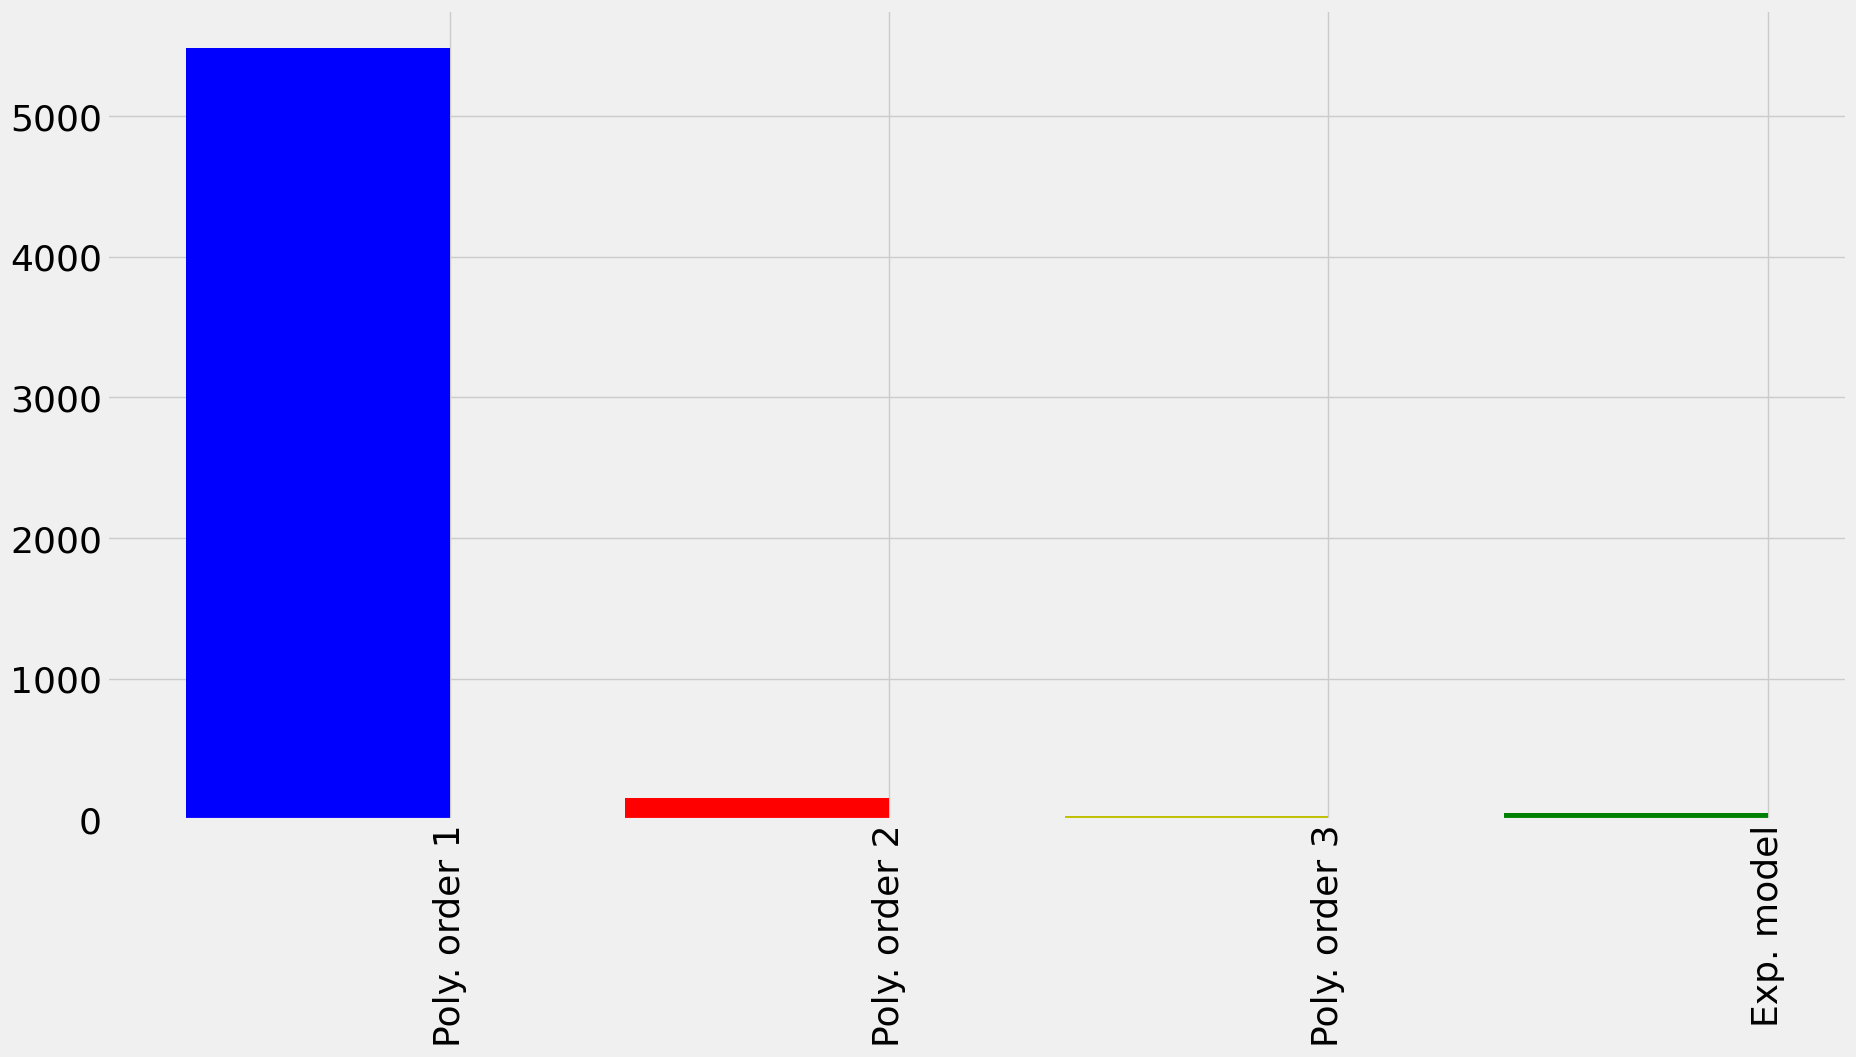

In [24]:
# Ячейка для кода №13
# Визуализируйте погрешность для каждого года

x = df_hist.year
width = 0.2   #размер столбца

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')
p4 = ax.bar( x + 3*width, errors_hist[3], width, color = 'g', label = 'Abs. exponential fit')

# "Украсьте" столбцовую диаграмму
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Визуализируйте MSE для каждой модели
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #размер столбца

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')
p4 = ax.bar( x[3], mse_hist[3], width, color = 'g', label = 'pred. exponential fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3', 'Exp. model' ], rotation=90)
plt.show()

Из последнего графика кажется, что полином третьего порядка, не являясь *истиной* моделью, лучше подходит для описания трафика в наблюдаемом диапазоне. Но насколько хорошо эта модель будет работать вне этого диапазона (*например*, если мы хотим использовать её, чтобы сделать **прогнозы** о будущем объеме интернет-трафика)?

## Часть 8: Используйте модель регрессии для прогнозирования будущих значений
В этой части вы рассмотрите прогнозируемые значения для объема фиксированного интернет-трафика. Предполагая одинаковые темпы роста на период 2005-2015 годов, данные генерируются и сохраняются в наборе данных `internet_traffic_proj.csv`. Загрузите его содержимое в `Кадр данных` с именем `df_proj` и визуализируйте первые несколько строк.
#### Шаг 1: Загрузка и визуализация прогнозируемого объема интернет-трафика.

In [27]:
# Ячейка для кода №14
# filename = 'internet_traffic_proj.csv'
# df_proj = ...
# df_proj.head()
filename = '/content/sample_data/internet_traffic_proj.csv'
# Загружаем данные в DataFrame
df_proj = pd.read_csv(filename)

# Выводим первые несколько строк DataFrame
df_proj.head()


,traffic,year
0,931.200929,2015
1,1266.783122,2016
2,1427.662376,2017
3,1749.671543,2018
4,2281.869542,2019


#### Шаг 2. Сравните погрешности прогнозирования для линейной и нелинейной модели.

Объедините `df_proj` и `df_hist` `кадры данных`, и визуализируйте, как ведет себя ранее примененная модель регрессии при прогнозировании будущих значений.

In [28]:
# Ячейка для кода №15
df = pd.concat([df_hist, df_proj]).reset_index()
df.drop('index', axis=1, inplace=True)
df = df.drop_duplicates() #Значение 2015 можно найти, как в df_hist, так и в df_proj df
df.head(20)

,traffic,year
0,931.200929,2015
1,1266.783122,2016
2,1427.662376,2017
3,1749.671543,2018
4,2281.869542,2019
5,3000.117699,2020


ValueError: x and y must have same first dimension, but have shapes (6,) and (16,)

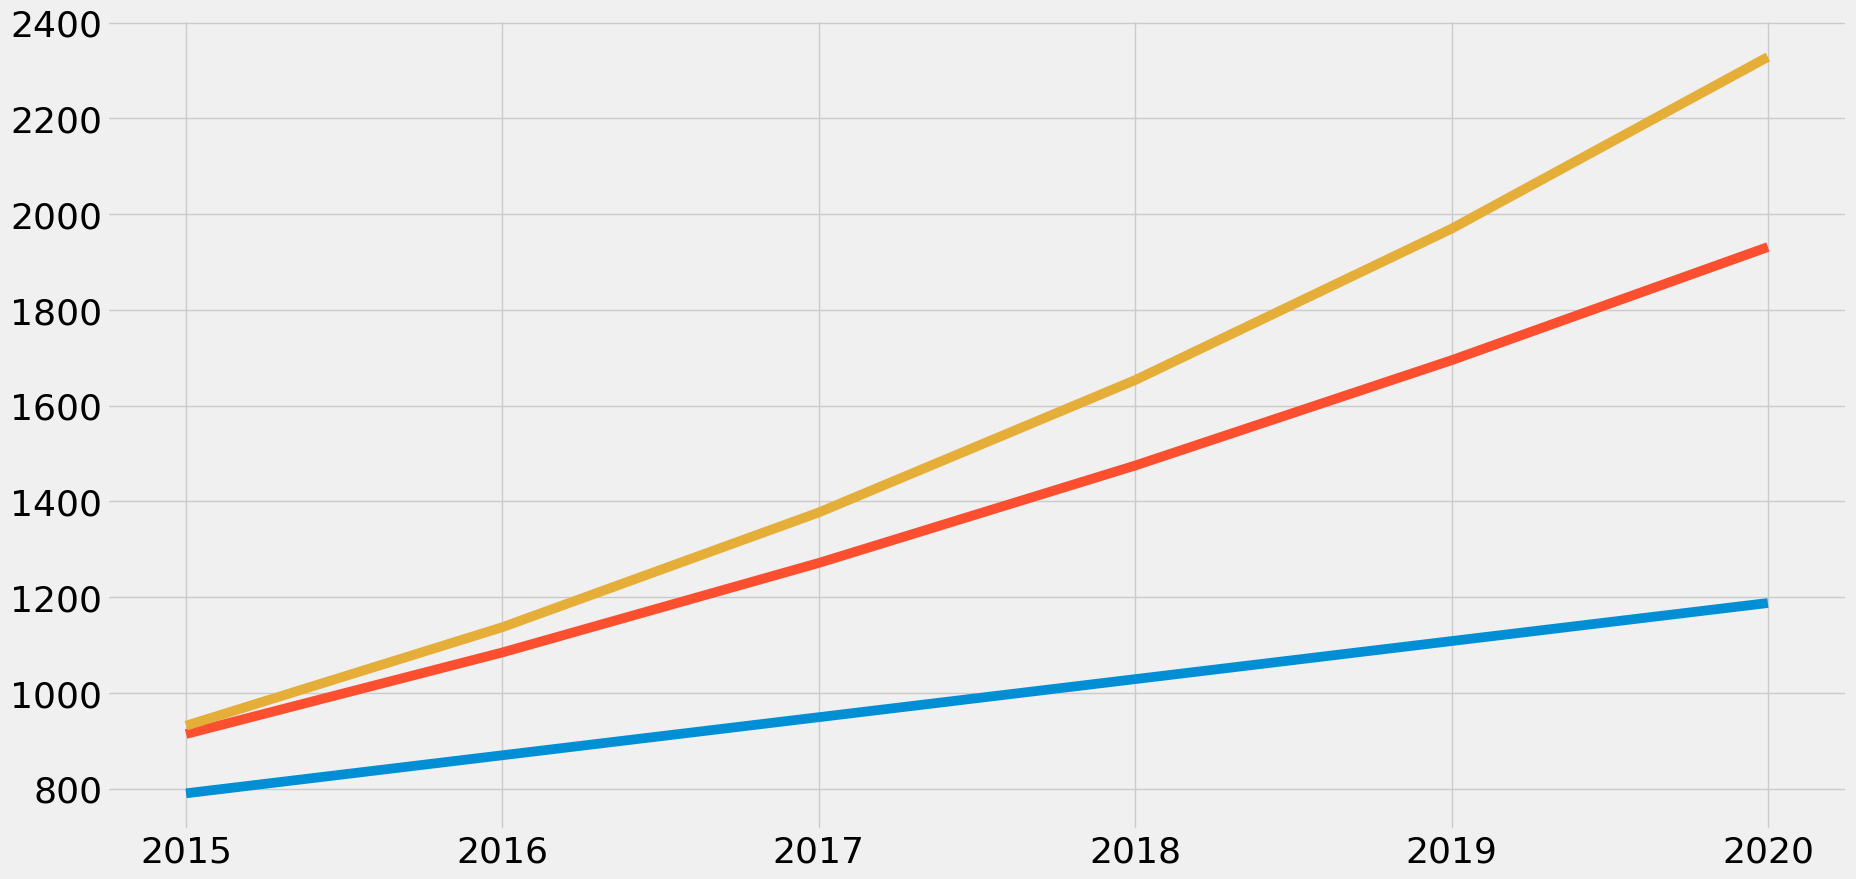

In [35]:
# Ячейка для кода №16
plt.figure(figsize = (20,10))

errors_all = []
mse_all = []

for model in models[0:-1]:

    # Визуализируйте применимость полиномиальной модели
    x = df.year.values
    y = df.traffic.values
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

    # погрешности и mse для полиномиальных моделей
    pred_y = model(x)
    e = np.abs(y - pred_y)
    errors_all.append(e)   #Хранит абсолютную погрешность
    mse_all.append(np.sum(e**2)/len(df)) # Хранит mse


# Визуализируйте применимость экспоненциальной модели
x = np.arange(2021-2005)    # независимой переменной является не сам по себе год, а количество лет с 2005 года
pred_y = my_exp_func(x, *models[-1])
plt.plot(df.year.values, pred_y, label = 'Exp. non-linear regression', linewidth = 7)

# погрешности и mse для экспоненциальной модели
e = np.abs(y - pred_y)
errors_all.append(e)   #Хранит абсолютную погрешность
mse_all.append(np.sum(e**2)/len(df)) # Хранит mse

plt.plot(df.year, df.traffic, '*k', markersize = 14, label='Projected Internet Traffic')
plt.legend(loc = 'upper left')

# Добавьте метки осей
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.axis([2004,2021, -300, 3500])
plt.show()

Какой вывод вы можете сделать о точности прогнозирования с использованием полиномиальной модели 3-го порядка и экспоненциальной модели?

Для Наблюдаемого Диапазона (2005–2015):
* Полиномиальная модель 3-го порядка лучше всего подходит для описания исторических данных благодаря своей гибкости и способности точно соответствовать сложным тенденциям.

Для Прогнозируемого Диапазона (2016–2020):
* Экспоненциальная модель оказывается более надежной и точной при экстраполяции. Она лучше отражает естественный характер роста интернет-трафика и меньше подвержена перебору.

Полиномиальная Модель 3-го Порядка лучше подходит для описания данных в наблюдаемом диапазоне, но становится менее точной при экстраполяции.
Экспоненциальная Модель является более надежной для прогнозирования долгосрочных тенденций, так как она лучше отражает естественный характер экспоненциального роста интернет-трафика.

#### Шаг 3. (Самостоятельный - обязателен для получения максимального балла за выполнение задания)
Используя данные об объеме интернет трафика [ITU](https://www.itu.int/itu-d/reports/statistics/2023/10/10/ff23-internet-traffic/) представленные в приложении к настоящему заданию (архив `ITU`), отобразите:
- Наблюдаемые в 2005-2022 году объемы  потребления Интернет-трафика
- Прогнозы всех моделей регрессии для этого периода.<br> <br>Вставьте ниже использованный вами скрипт и результаты его выполнения.
 *Подсказка:*  для выполнения этого задания вам может помочь применение методов `pd.read_excel` и `to_excel` библиотеки Pandas


MSE для каждой модели:
Order 1: 366549.19
Order 2: 365808.77
Order 3: 365808.76
Exponential: 382701.07


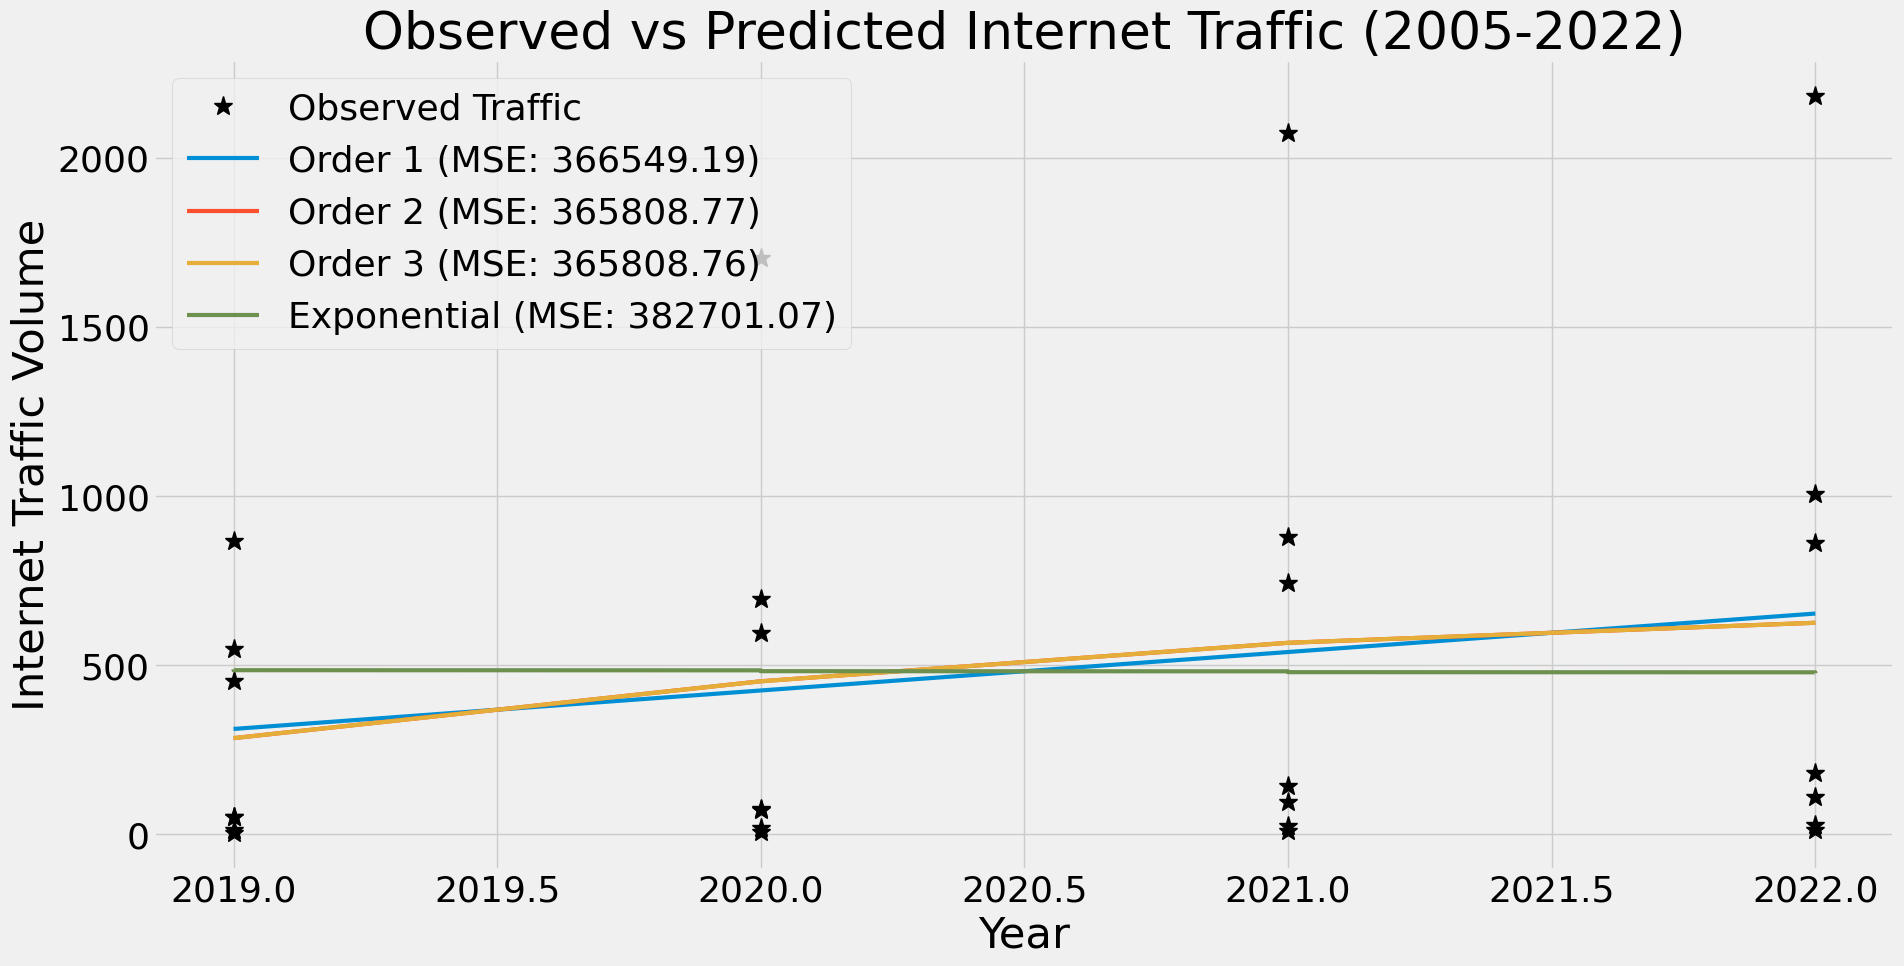

In [50]:
###Скрипт 4.2.
# Шаг 1: Загрузка данных из всех файлов
file_list = [
    '/content/sample_data/ITU-2019_data.csv',
    '/content/sample_data/ITU-2020_data.csv',
    '/content/sample_data/ITU-2021_data.csv',
    '/content/sample_data/ITU-2022_data.csv'
]

# Создаем пустой список для хранения DataFrames
dfs = []

# Загружаем каждый файл и добавляем его в список
for file in file_list:
    df = pd.read_csv(file, sep=';')  # Указываем разделитель ';'

    # Переименование столбцов для удобства
    df.rename(columns={
        'Internet traffic, in exabytes': 'Traffic'
    }, inplace=True)

    # Добавляем DataFrame в список
    dfs.append(df)

# Объединяем все DataFrames в один
df_itu = pd.concat(dfs, ignore_index=True)

# Проверка наличия столбцов 'Year' и 'Traffic'
if 'Year' not in df_itu.columns or 'Traffic' not in df_itu.columns:
    raise KeyError("Столбцы 'Year' или 'Traffic' отсутствуют в объединенных данных!")

# Преобразуем значения трафика в числовой формат
# Удаляем запятые и преобразуем строки в числа
df_itu['Traffic'] = df_itu['Traffic'].str.replace(',', '.').astype(float)

# Убедимся, что данные отсортированы по году
df_itu = df_itu.sort_values(by='Year').reset_index(drop=True)

# Извлечение данных
x_years = df_itu['Year'].values  # Года
y_traffic = df_itu['Traffic'].values  # Объем трафика

# Шаг 2: Определение функций для моделей регрессии

# Полиномиальная модель
def poly_model(x, order):
    return np.poly1d(np.polyfit(x_years, y_traffic, order))(x)

# Экспоненциальная модель
def exp_func(x, a, b):
    return a * (b ** x)

# Подгонка экспоненциальной модели
p_exp, _ = curve_fit(exp_func, np.arange(len(x_years)), y_traffic)

# Шаг 3: Прогнозирование значений для всех моделей
models = {
    "Order 1": lambda x: poly_model(x, 1),
    "Order 2": lambda x: poly_model(x, 2),
    "Order 3": lambda x: poly_model(x, 3),
    "Exponential": lambda x: exp_func(np.arange(len(x_years)), *p_exp)
}

# Создадим DataFrame для хранения прогнозов
predictions = pd.DataFrame()
predictions['Year'] = x_years
predictions['Observed Traffic'] = y_traffic

# Словарь для хранения MSE каждой модели
mse_results = {}

for name, model in models.items():
    predictions[name] = model(x_years)

    # Вычисляем MSE
    mse = np.mean((predictions['Observed Traffic'] - predictions[name]) ** 2)
    mse_results[name] = mse

# Выводим MSE для каждой модели
print("MSE для каждой модели:")
for name, mse in mse_results.items():
    print(f"{name}: {mse:.2f}")

# Шаг 4: Визуализация результатов
plt.figure(figsize=(20, 10))

# Наблюдаемые данные
plt.plot(predictions['Year'], predictions['Observed Traffic'], '*k', markersize=14, label='Observed Traffic')

# Прогнозы моделей
for name in models.keys():
    plt.plot(predictions['Year'], predictions[name], label=f"{name} (MSE: {mse_results[name]:.2f})", linewidth=3)

# Настройка графика
plt.xlabel('Year')
plt.ylabel('Internet Traffic Volume')
plt.title('Observed vs Predicted Internet Traffic (2005-2022)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

<font size='0.5'>&copy; 2024 УрФУ-ИРИТ-ДИТА<font>